Spectral Whitening is a frequency-wise normalization technique for log spectrograms that enchances the relative decibel of transient features within each frequency bin, while preserving decibel information. This makes each spectrogram more robust and invariant to background noise level while preseving the physical meaning of the spectrogram and audio.

In [ ]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

In [ ]:
FILE_NAME = "ship-engine.mp3" # ship engine
audio, sr = sf.read(FILE_NAME) # 24Hz, stereo
duration = audio.shape[0] // sr

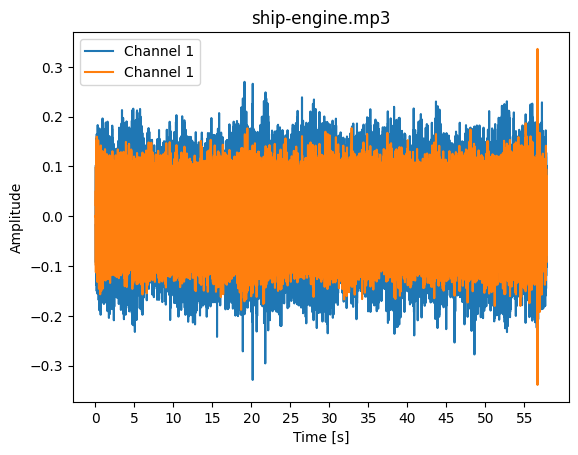

In [ ]:
plt.plot(audio[:, 0], label="Channel 1")
plt.plot(audio[:, 1], label="Channel 1")
plt.xticks([i*sr for i in range(60) if i % 5 == 0], [str(j) for j in range(60) if j % 5 == 0])
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("ship-engine.mp3")
plt.legend()
plt.show()

In [ ]:
audio = audio[:(sr * 10)] # first 10s only
audio_ch1 = audio[:, 0] # channel 1
audio_ch2 = audio[:, 1] # channel 2

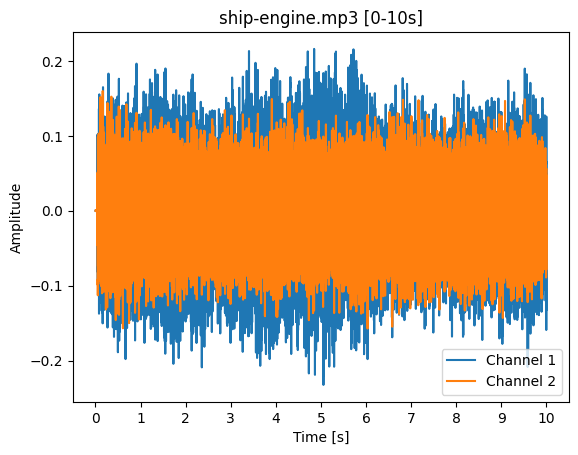

In [ ]:
plt.plot(audio_ch1, label="Channel 1")
plt.plot(audio_ch2, label='Channel 2')
plt.xticks([i*sr for i in range(11)], ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("ship-engine.mp3 [0-10s]")
plt.legend()
plt.show()

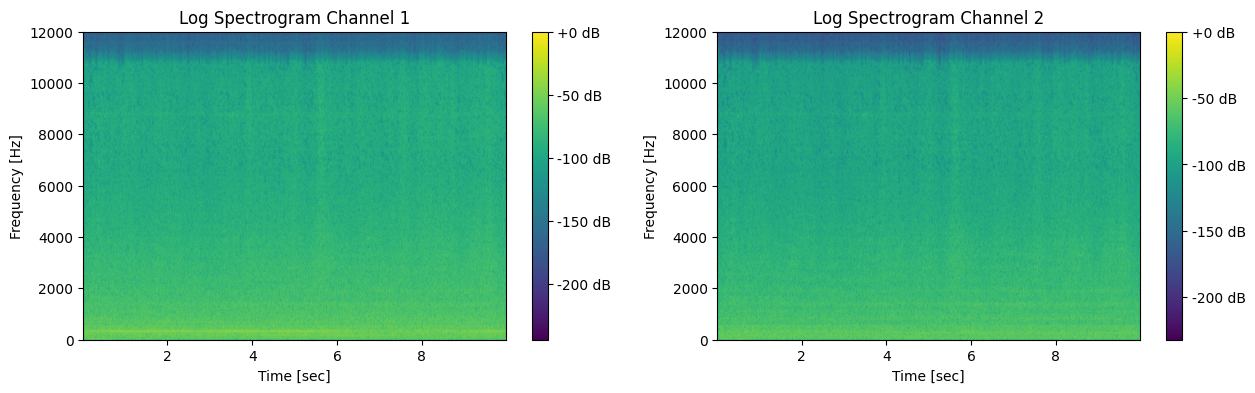

In [ ]:
nfft = 512

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
# generate power density spectrograms with 50% overlap for each audio channel
f_ch1, t_ch1, Sxx_ch1 = spectrogram(audio_ch1, fs=sr, nperseg=nfft, noverlap=nfft//2, nfft=nfft, detrend=None, scaling='density', mode='psd')
f_ch2, t_ch2, Sxx_ch2 = spectrogram(audio_ch2, fs=sr, nperseg=nfft, noverlap=nfft//2, nfft=nfft, detrend=None, scaling='density', mode='psd')

# convert to log spectrograms and decibels
log_Sxx_ch1 = 10 * np.log10(abs(Sxx_ch1))
log_Sxx_ch2 = 10 * np.log10(abs(Sxx_ch2))

# plot log spectrograms
im_ch1 = ax[0].pcolormesh(t_ch1, f_ch1, log_Sxx_ch1, shading='gouraud', vmax=0)
fig.colorbar(im_ch1, orientation='vertical', format="%+2.f dB")
ax[0].set_title("Log Spectrogram Channel 1")
ax[0].set_ylabel('Frequency [Hz]')
ax[0].set_xlabel('Time [sec]')
im_ch2 = ax[1].pcolormesh(t_ch2, f_ch2, log_Sxx_ch2, shading='gouraud', vmax=0)
fig.colorbar(im_ch2, orientation='vertical', format="%+2.f dB")
ax[1].set_title("Log Spectrogram Channel 2")
ax[1].set_ylabel('Frequency [Hz]')
ax[1].set_xlabel('Time [sec]')
plt.show()


In [ ]:
# spectral whitening for normalisation
norm_Sxx_ch1 = (log_Sxx_ch1 - np.median(log_Sxx_ch1, axis=1, keepdims=True)) # frequency-wise mean centering using the median
norm_Sxx_ch2 = (log_Sxx_ch1 - np.median(log_Sxx_ch2, axis=1, keepdims=True))

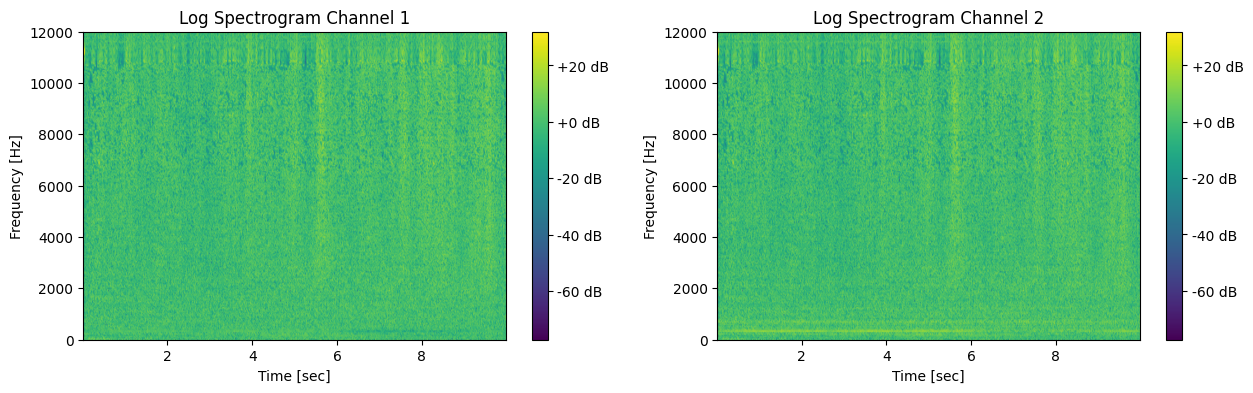

In [ ]:
# plot the spectral whitened log spectrograms
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
im_ch1 = ax[0].pcolormesh(t_ch1, f_ch1, norm_Sxx_ch1, shading='gouraud')
fig.colorbar(im_ch1, orientation='vertical', format="%+2.f dB") # relative dB compared to background level for each frequency
ax[0].set_title("Log Spectrogram Channel 1")
ax[0].set_ylabel('Frequency [Hz]')
ax[0].set_xlabel('Time [sec]')
im_ch2 = ax[1].pcolormesh(t_ch2, f_ch2, norm_Sxx_ch2, shading='gouraud')
fig.colorbar(im_ch2, orientation='vertical', format="%+2.f dB")
ax[1].set_title("Log Spectrogram Channel 2")
ax[1].set_ylabel('Frequency [Hz]')
ax[1].set_xlabel('Time [sec]')
plt.show()
